In [40]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
cars = pd.read_csv("imports-85.data")

cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### The dataset does not include column name, then we have to add in the names manually through the dataset guide [here](https://archive.ics.uci.edu/ml/datasets/automobile)

In [42]:
colnames = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']


cars = pd.read_csv("imports-85.data", names=colnames)

In [43]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. Data Cleaning 

#### The k-nearest neighbors algorithm uses the distance formula to determine the nearest neighbors. 
#### That means, we can only use numerical columns for this machine learning algorithm. 
#### So we'll have to do a little bit of data cleaning.

#### Here are some of the issues with this dataframe:

#### There are missing values with the string '?'.
#### There are many non numerical columns.

#### First, we'll replace the string value '?' with NaN. 
#### That way, we can use the .isnull() method to determine which columns have missing values.

#### Using the documentation, we can determine which columns are not numerical. Then we can drop them from the dataframe.

In [44]:
cars = cars.replace("?", np.nan)

In [45]:

to_drop = ["symboling", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", 
                  "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system", "engine-size"]

cars_num = cars.drop(to_drop, axis=1)

In [46]:

cars_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [53]:
# transfer everything into float

cars_num = cars_num.astype("float")
cars_num.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [54]:
cars_num = cars_num.dropna(subset=["price"])
cars_num.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [55]:
cars_num = cars_num.fillna(cars_num.mean())
cars_num.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [56]:
cars_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


#### The k-nearest neighbors algorithm uses the euclidean distance to determine the closest neighbor.
####  $Distance = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_n - p_n)^2}$

#### Where q and p represent two rows and the subscript representing a column. However, each column have different scaling. For example, if we take row 2, and row 3.

#### That is why it is important to normalize the dataset into a unit vector. After normalization we'll have values from -1 to 1.

#### $ X^\prime = \frac{x - mean(x)}{x(max) - x(min)}$

In [57]:
normalized_cars = (cars_num-cars_num.mean())/(cars_num.max()-cars_num.min())
normalized_cars['price'] = cars_num['price']

In [58]:
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


#### 3. Univariate Model

#### We are going to write a function that uses the KNeighborsRegressor class from scikit-learn. This works a little bit differently, the class actually generates a model that fits the training dataset. It is a regression method using k-nearest neighbors.

In [59]:
#Returns the root mean squared error using KNN
def knn_train_test(features, target_col, df):
    #randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor()
    knn.fit(train_df[[features]], train_df[[target_col]])
    
    #test
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

#### We can write a for loop and use the function for each column. That way, we can see the RMSE of each column.

In [60]:
features = normalized_cars.columns.drop('price')
rmse = {}
for item in features:
    rmse[item] = knn_train_test(item, 'price', normalized_cars)

results = pd.Series(rmse)
results.sort_values()

horsepower           4010.414152
curb-weight          4401.118255
highway-mpg          4652.697833
width                4908.609914
city-mpg             4973.940485
length               5429.900973
wheel-base           5460.787788
compression-rate     6610.812153
bore                 6806.695830
normalized-losses    7304.373172
peak-rpm             7678.470979
height               7842.199226
stroke               8005.611387
dtype: float64

#### It looks like the 'horsepower' column has the least amount of error. We should definitely keep this list in mind when using the function for multiple features.

#### But first, let's modify the function to include k value or the number of neighbors as a parameter. Then we can loop through a list of K values and features to determine which K value and features are most optimal in our machine learning model.

In [61]:
def knn_train_test2(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[features]], train_df[[target_col]])
        
        #test
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [62]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = [1, 3, 5, 7, 9]
features = normalized_cars.columns.drop('price')
feature_k_rmse = {}

for item in features:
    feature_k_rmse[item] = knn_train_test2(item, 'price', normalized_cars, k)
    
feature_k_rmse

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6806.6958300755823,
  7: 6939.1058456518022,
  9: 6915.2973750134106},
 'city-mpg': {1: 5863.1909434713079,
  3: 4672.77285307275,
  5: 4973.9404846610796,
  7: 5413.3908826775387,
  9: 5277.1766643494775},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5288.0195725810245,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6701276238755,
  9: 4633.4258799947584},
 'height': {1: 8942.0129519959519,
  3: 8378.2338527728607,
  5: 7842.199225717336,
  7: 7709.0699416548505,
  9: 7777.1734491607085},
 'highway-mpg': {1: 6022.8667247547837,
  3: 4671.3903897894661,
  5: 4652.6978325259934,
  7: 4817.2301043607267,
  9: 5261.877043557105},
 'horsepower': {1: 4170.0548480378011,
  3: 3985.1389178696736,
  5: 4010.4141521891734,
  7: 4351.2682711815723,
  9: 4514.5046414780554},
 'length': {1: 4611.990241761

normalized-losses
average_rmse: 7592.98559257
wheel-base
average_rmse: 5269.9420303
length
average_rmse: 5173.30027712
width
average_rmse: 4723.40633346
height
average_rmse: 8129.73788426
curb-weight
average_rmse: 4735.11036935
bore
average_rmse: 7249.58540494
stroke
average_rmse: 7990.34976685
compression-rate
average_rmse: 7166.07359873
horsepower
average_rmse: 4206.27616615
peak-rpm
average_rmse: 8122.47715404
city-mpg
average_rmse: 5240.09436565
highway-mpg
average_rmse: 5085.212419


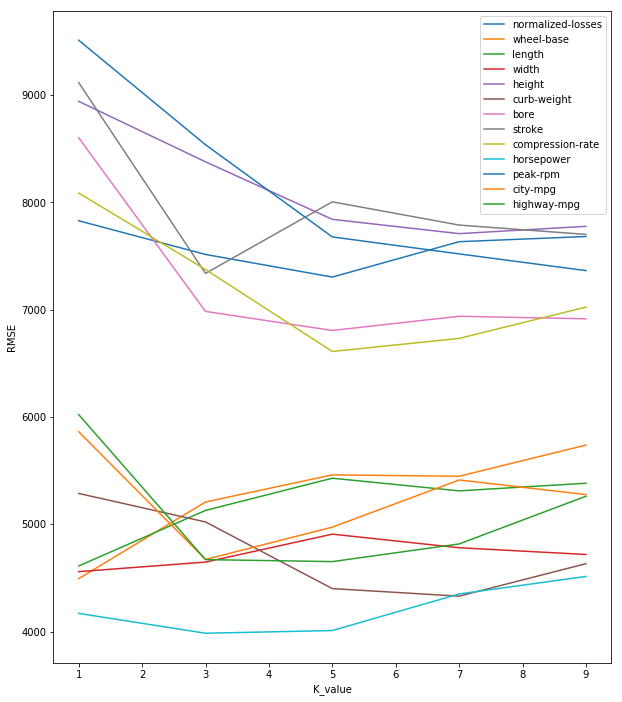

In [64]:

best_features  = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

#### This figure is a bit confusing to look at. A better way is to sort the values of the best_features which contains the features as the key and the average RMSE as the values.

In [65]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'length',
 'city-mpg',
 'wheel-base',
 'compression-rate',
 'bore',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

#### Now we know which features have the lowest amount of error, we can begin applying the function to multiple features at once.

In [67]:

def knn_train_test3(features, target_col, df):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[[target_col]])
    #test
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [68]:
k_rmse_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]


k_rmse_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', normalized_cars)
k_rmse_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', normalized_cars)
k_rmse_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', normalized_cars)
k_rmse_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', normalized_cars)

In [70]:

k_rmse_features

{'best_five_rmse': 3533.7489988020734,
 'best_four_rmse': 3404.6909417321376,
 'best_three_rmse': 3214.9121121904577,
 'best_two_rmse': 3635.0424706141075}

#### best three features gave us the lowest RMSE.

#### Now, let's try varying the K values. We can further tune our machine learning model by finding the optimal K value to use.

In [71]:
def knn_train_test4(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_col]])
        #test
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [72]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = list(range(1,25))
features = [best_three_features, best_four_features, best_five_features]
feature_k_rmse2 = {}
feature_k_rmse2["best_three_features"] = knn_train_test4(best_three_features, 'price', normalized_cars, k)
feature_k_rmse2["best_four_features"] = knn_train_test4(best_four_features, 'price', normalized_cars, k)
feature_k_rmse2["best_five_features"] = knn_train_test4(best_five_features, 'price', normalized_cars, k)

In [74]:

feature_k_rmse2

{'best_five_features': {1: 2925.2716823983351,
  2: 3052.8623032449823,
  3: 3142.3061973053741,
  4: 3461.5611810315809,
  5: 3533.7489988020734,
  6: 3374.173588712601,
  7: 3375.8777215393952,
  8: 3324.8765407828332,
  9: 3312.5026279334488,
  10: 3366.8513243970342,
  11: 3447.2822267103743,
  12: 3496.4998131087186,
  13: 3547.2160454903924,
  14: 3615.6147456955036,
  15: 3579.8430331574878,
  16: 3678.5032168509852,
  17: 3750.9694042951901,
  18: 3815.3901236791603,
  19: 3851.386198466123,
  20: 3939.9382237297746,
  21: 3975.0410078767027,
  22: 4005.3349453198225,
  23: 4054.6714936766848,
  24: 4106.5508513093364},
 'best_four_features': {1: 2870.8002868762419,
  2: 2924.256000834373,
  3: 3217.2983830519292,
  4: 3392.3729838615423,
  5: 3404.6909417321376,
  6: 3532.1939129716366,
  7: 3523.4548938173461,
  8: 3405.9189129672363,
  9: 3400.2247346580157,
  10: 3549.4612599577126,
  11: 3539.8305425349599,
  12: 3562.1876094096256,
  13: 3675.4563993723814,
  14: 3770.166

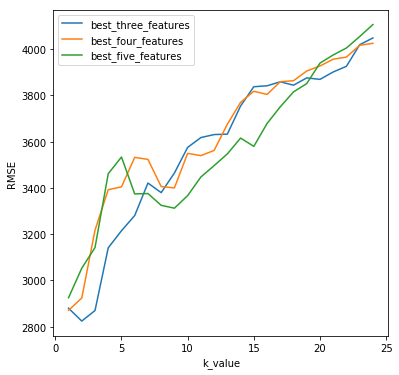

In [75]:
plt.figure(figsize=(6, 6))

for key, value in feature_k_rmse2.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()


#### From the chart above, we can see that choosing the best three features with a K value of 2 will give us the RMSE of 2824.
